# ラボ1 量子回路

Prerequisite

- [Qiskit basics](https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html)
- [Ch.1.2 計算の原子](/course/ch-states/the-atoms-of-computation)

Other relevant materials

- [IBM Quantum Systemsにアクセスする](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)
- [IBM Quantum Systemsの構成](https://quantum-computing.ibm.com/docs/manage/backends/configuration)
- [Transpile](https://qiskit.org/documentation/apidoc/transpiler.html)
- [IBM Quantum アカウント](https://quantum-computing.ibm.com/docs/manage/account/ibmq)
- [Quantum Circuits](https://qiskit.org/documentation/apidoc/circuit.html) 

In [4]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np

## パート1：量子回路における古典的な論理ゲート

**Goal**

NOTゲート（Qiskitではxとして表されます）、CNOTゲート（Qiskitではcxとして表されます）、およびToffoliゲート（Qiskitではccxとして表されます）を使用して、XOR、AND、NAND、およびORゲートを計算できる量子回路関数を作成します。

An implementation of the `NOT` gate is provided as an example.

In [2]:
def NOT(inp):
    """An NOT gate.
    
    Parameters:
        inp (str): Input, encoded in qubit 0.
        
    Returns:
        QuantumCircuit: Output NOT circuit.
        str: Output value measured from qubit 0.
    """

    qc = QuantumCircuit(1, 1) # A quantum circuit with a single qubit and a single classical bit
    qc.reset(0)
    
    # We encode '0' as the qubit state |0⟩, and '1' as |1⟩
    # Since the qubit is initially |0⟩, we don't need to do anything for an input of '0'
    # For an input of '1', we do an x to rotate the |0⟩ to |1⟩
    if inp=='1':
        qc.x(0)
        
    # barrier between input state and gate operation 
    qc.barrier()
    
    # Now we've encoded the input, we can do a NOT on it using x
    qc.x(0)
    
    #barrier between gate operation and measurement
    qc.barrier()
    
    # Finally, we extract the |0⟩/|1⟩ output of the qubit and encode it in the bit c[0]
    qc.measure(0,0)
    qc.draw()
    
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
    
    return qc, output

NOT with input 0 gives output 1


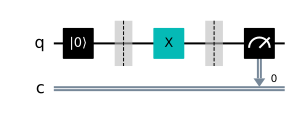



NOT with input 1 gives output 0


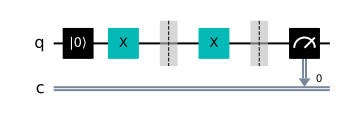

In [3]:
## Test the function
for inp in ['0', '1']:
    qc, out = NOT(inp)
    print('NOT with input',inp,'gives output',out)
    display(qc.draw())
    print('\n')

### 📓 XORゲート

Takes two binary strings as input and gives one as output.

入力が等しい場合、出力は<code>'0'</code>であり、そうでない場合、出力は<code>'1'</code>です。

In [2]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    
    
    
    
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [1]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

### 📓 ANDゲート

Takes two binary strings as input and gives one as output.

両方の入力が`'1'`の場合にのみ、出力は`'1'`になります。

In [6]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    
    
    
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [2]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

### 📓 NANDゲート

Takes two binary strings as input and gives one as output.

両方の入力が`'1'`の場合にのみ、出力は`'0'`になります。

In [8]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [3]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

### 📓 ORゲート

Takes two binary strings as input and gives one as output.

いずれかの入力が<code>'1'</code>の場合、出力は<code>'1'</code>です。

In [10]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes


    
    
    
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

In [4]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw())
        print('\n')

## Part 2: AND gate on Quantum Computer

**Goal**

Execute AND gate on a real quantum system and learn how the noise properties affect the result.

In Part 1 you made an `AND` gate from quantum gates, and executed it on the simulator.  Here in Part 2 you will do it again, but instead run the circuits on a real quantum computer.  When using a real quantum system, one thing you should keep in mind is that present day quantum computers are not fault tolerant; they are noisy.

量子系の「ノイズ」は、起こるべきではないが、それでも起こるすべてのことの集合的な影響です。出力でのノイズの結果は、必ずしも私たちが期待するものではありません。量子回路のすべてのプロセスに関連するノイズがあります：初期状態の準備、ゲートの適用、および量子ビット測定。ゲートの場合、ノイズレベルはゲート間および量子ビット間で異なる可能性があります。 `cx`ゲートは通常、単一量子ビットのゲートよりもノイズが多くなります。

Here we will use the quantum systems from the IBM Quantum Experience.  If you do not have access, you can do so [here](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems).

Now that you are ready to use the real quantum computer, let's begin.

### ステップ1. デバイスの選択

First load the account from the credentials saved on disk by running the following cell:

In [17]:
IBMQ.load_account()

After your account is loaded, you can see the list of providers that you have access to by running the cell below. Each provider offers different systems for use. For open users, there is typically only one provider `ibm-q/open/main`:

In [16]:
IBMQ.providers()

`get_provider`を使用してプロバイダーを取得しましょう。コマンド`provider.backends()`は、選択したプロバイダーから利用できるバックエンドのリストを表示します。

In [15]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

Among these options, you may pick one of the systems to run your circuits on.  All except the `ibmq_qasm_simulator` all are real quantum computers that you can use.  The differences among these systems resides in the number of qubits, their connectivity, and the system error rates.  

Upon executing the following cell you will be presented with a widget that displays all of the information about your choice of the backend.  You can obtain information that you need by clicking on the tabs. For example, backend status, number of qubits and the connectivity are under `configuration` tab, where as the `Error Map` tab will reveal the latest noise information for the system. 

In [9]:
import qiskit.tools.jupyter

backend_ex = provider.get_backend('ibmq_lima')
backend_ex

For our AND gate circuit, we need a backend with three or more qubits, which is true for all the real systems except for `ibmq_armonk`.  Below is an example of how to filter backends, where we filter for number of qubits, and remove simulators:

In [8]:
backends = provider.backends(filters = lambda x:x.configuration().n_qubits >= 2 and not x.configuration().simulator
                             and x.status().operational==True)
backends

One convenient way to choose a system is using the `least_busy` function to get the backend with the lowest number of jobs in queue.  The downside is that the result might have relatively poor accuracy because, not surprisingly, the lowest error rate systems are the most popular.

In [17]:
from qiskit.providers.ibmq import least_busy
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

Real quantum computers need to be recalibrated regularly, and the fidelity of a specific qubit or gate can change over time. Therefore, which system would produce results with less error can vary.

この演習では、IBM Quantumシステムの1つである`ibmq_quito`を選択します。

In [2]:
# run this cell
backend = provider.get_backend('ibmq_quito')

### ステップ2. 実際のデバイスのAND関数を定義する

We now define the AND function.  We choose 8192 as the number of shots, the maximum number of shots for open IBM systems, to reduce the variance in the final result. Related information is well explained [here](https://quantum-computing.ibm.com/docs/manage/backends/configuration).

#### Qiskit トランスパイラー

It is important to know that when running a circuit on a real quantum computer, circuits typically need to be transpiled for the backend that you select so that the circuit contains only those gates that the quantum computer can actually perform. Primarily this involves the addition of swap gates so that two-qubit gates in the circuit map to those pairs of qubits on the device that can actually perform these gates. The following cell shows the AND gate represented as a Toffoli gate decomposed into single- and two-qubit gates, which are the only types of gate that can be run on IBM hardware.

In [5]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw())
print('\n\nTranspiled AND gate with all the required connectivity')
qc_and.decompose().draw()



Transpiled AND gate with all the required connectivity


q_0: ──■──
       │  
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘



Transpiled AND gate with all the required connectivity


┌───┐      
q_0: ───────────────────■─────────────────────■────■───┤ T ├───■──
                        │             ┌───┐   │  ┌─┴─┐┌┴───┴┐┌─┴─┐
q_1: ───────■───────────┼─────────■───┤ T ├───┼──┤ X ├┤ TDG ├┤ X ├
     ┌───┐┌─┴─┐┌─────┐┌─┴─┐┌───┐┌─┴─┐┌┴───┴┐┌─┴─┐├───┤└┬───┬┘└───┘
q_2: ┤ H ├┤ X ├┤ TDG ├┤ X ├┤ T ├┤ X ├┤ TDG ├┤ X ├┤ T ├─┤ H ├──────
     └───┘└───┘└─────┘└───┘└───┘└───┘└─────┘└───┘└───┘ └───┘

In addition, there are often optimizations that the transpiler can perform that reduce the overall gate count, and thus total length of the input circuits.  Note that the addition of swaps to match the device topology, and optimizations for reducing the length of a circuit are at odds with each other. In what follows we will make use of `initial_layout` that allows us to pick the qubits on a device used for the computation and `optimization_level`, an argument that allows selecting from internal defaults for circuit swap mapping and optimization methods to perform.

You can learn more about transpile function in depth [here](https://qiskit.org/documentation/apidoc/transpiler.html).

Let's modify AND function in Part1 properly for the real system with the transpile step included.

In [ ]:
from qiskit.tools.monitor import job_monitor

In [6]:
# run the cell to define AND gate for real quantum system

def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

When you submit jobs to quantum systems, `job_monitor` will start tracking where your submitted job is in the pipeline.

まず、下のセルを実行して、ウィジェットから`ibmq_quito`を調べます。

In [ ]:
backend

📓 エラーマップを考慮して3量子ビットの初期レイアウトを決定し、それをリスト変数layout2に割り当てます。

In [ ]:
layout =

📓 初期レイアウトを選択した理由を説明してください。

**あなたの答え：** 

以下のセルを実行して、 `ibmq_quito`で`AND`ゲートを実行します。

In [ ]:
output_all = []
qc_trans_all = []
prob_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans, output = AND(input1, input2, backend, layout)
        
        output_all.append(output)
        qc_trans_all.append(qc_trans)
        
        prob = output[str(int( input1=='1' and input2=='1' ))]/8192
        prob_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

### ステップ3. 結果を解釈する

There are several quantities that distinguish the circuits.  Chief among them is the  **circuit depth**.  Circuit depth is defined in detail [here](https://qiskit.org/documentation/apidoc/circuit.html) (See the Supplementary Information and click the Quantum Circuit Properties tab). Circuit depth is proportional to the number of gates in a circuit, and loosely corresponds to the runtime of the circuit on hardware.   Therefore, circuit depth is an easy to compute metric that can be used to estimate the fidelity of an executed circuit.

2番目の重要な値は、回路内の**非ローカル**（複数量子ビット）**ゲート**の数です。 IBM Quantumシステムでは、物理的に実行できる唯一の非ローカル・ゲートはCNOTゲートです。 CNOTゲートは実行するのに最も高価なゲートであるため、これらのゲートの総数は、最終出力の精度の優れたベンチマークとしても機能することを思い出してください。

#### 回路の深さと結果の精度

Running the cells below will display the four transpiled AND gate circuit diagrams with the corresponding inputs that executed on `ibm_lagos` and their circuit depths with the success probability for producing correct answer.

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[0]) )
qc_trans_all[0].draw()

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[1]) )
qc_trans_all[1].draw()

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[2]) )
qc_trans_all[2].draw()

In [ ]:
print('Transpiled AND gate circuit for ibmq_vigo with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[3]) )
qc_trans_all[3].draw()

📓 回路の非類似性の理由を説明してください。回路の特性と結果の精度との関係を説明してください。

**あなたの答え：**